In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# OrderBookPlots2002_df = pd.read_csv('./resources/2002.csv')
# OrderBookPlots2002_df = OrderBookPlots2002_df[OrderBookPlots2002_df.DATE.isin(['2002-08-12', '2002-08-13'])]
# OrderBookPlots2002_df

In [3]:
# OrderBookPlots2002_df['TRADENO'] = OrderBookPlots2002_df['TRADENO'].astype(pd.Int64Dtype())

In [4]:
# OrderBookPlots2002_df.sort_values(by=['NO'], inplace=True)

In [5]:
# OrderBookPlots2002_df[(OrderBookPlots2002_df.PRICE != OrderBookPlots2002_df.TRADEPRICE) &
#                  pd.notnull(OrderBookPlots2002_df.TRADEPRICE)]

In [6]:
OrderBookPlots2007_df = pd.read_csv('./resources/LKOH_SBER_GMKN_2007_10.csv')
OrderBookPlots2007_df = OrderBookPlots2007_df[(OrderBookPlots2007_df.SECCODE == 'LKOH') & 
                                              (OrderBookPlots2007_df.DATE == '2007-10-08')]
# OrderBookPlots2007_df = OrderBookPlots2007_df[OrderBookPlots2007_df.DATE.isin(['2007-10-01', '2007-10-02'])]
# OrderBookPlots2007_df

In [7]:
OrderBookPlots2007_df['TRADENO'] = OrderBookPlots2007_df['TRADENO'].astype(pd.Int64Dtype())

In [8]:
OrderBookPlots2007_df.sort_values(by=['NO'], inplace=True)

In [9]:
OrderBookPlots2007_df[(OrderBookPlots2007_df.PRICE != OrderBookPlots2007_df.TRADEPRICE) &
                 pd.notnull(OrderBookPlots2007_df.TRADEPRICE)]

,Unnamed: 0,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE,OBPLOTNO
1544302,17145,17146,LKOH,S,103001000,17122,2,2179.99,40,332168465,2180.00,2007-10-08,1399
1544318,17169,17170,LKOH,S,103001000,17071,2,2178.90,10,332168477,2180.00,2007-10-08,1399
1544321,17192,17193,LKOH,S,103001000,17081,2,2179.99,5,332168488,2180.00,2007-10-08,1399
1544324,17213,17214,LKOH,B,103001000,17130,2,0.00,50,332168499,2181.99,2007-10-08,129
1544326,17215,17216,LKOH,B,103001000,17053,2,2200.00,3,332168500,2181.99,2007-10-08,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834830,910304,910305,LKOH,S,174458000,395515,2,0.00,1,332355810,2175.60,2007-10-08,79324
1834832,910306,910307,LKOH,S,174458000,395515,2,0.00,84,332355811,2175.50,2007-10-08,79324
1834835,910309,910310,LKOH,S,174458000,395496,2,0.00,10,332355812,2175.50,2007-10-08,79324
1834836,910326,910327,LKOH,B,174458000,395498,2,0.00,1,332355821,2176.02,2007-10-08,79201


In [10]:
# OrderBookPlots2002_2000ms_df = OrderBookPlots2002_df[(OrderBookPlots2002_df.TIME >= 103002000) & (OrderBookPlots2002_df.TIME <= 103003000)]
# OrderBookPlots2002_2000ms_df

In [11]:
# OrderBookPlots2002_2000ms_df = OrderBookPlots2002_df[(OrderBookPlots2002_df.TIME >= 103002000) & (OrderBookPlots2002_df.TIME <= 103003000)]
def form_datetimemlls(df):
    scnd_size_df = pd.DataFrame(df.groupby('TIME').size())
    scnd_size_df.reset_index(inplace=True)
    scnd_size_df = scnd_size_df.rename(columns = {0:'SCNDSIZE'})
    df = df.merge(scnd_size_df, on='TIME')
    df['SEC_IND'] = df.groupby(['TIME']).cumcount()
    df['MILLISS'] = round(df['SEC_IND'] / df['SCNDSIZE'] * 1000)
    df['MILLISS'] = df['MILLISS'].astype(int)
    df.drop(['SCNDSIZE', 'SEC_IND'], axis=1, inplace=True)
    df['DATETIME'] = df.apply(lambda row: datetime.datetime.strptime(row.DATE, '%Y-%m-%d'), axis=1)
    df['DATETIMEMLLS'] = df.apply(lambda row: datetime.datetime(row.DATETIME.year,
                                                               row.DATETIME.month,
                                                               row.DATETIME.day,
                                                               int(row.TIME // 1e7),
                                                               int((row.TIME // 1e5) % 100),
                                                               int((row.TIME // 1e3) % 100)),
                                  axis=1)
    df['DATETIMEMLLS'] = df.apply(lambda row: row.DATETIMEMLLS +
                                 datetime.timedelta(milliseconds=row.MILLISS),
                                 axis=1)
    df.drop(['DATETIME', 'MILLISS', 'TIME'], axis=1, inplace=True)
    return(df)
# OrderBookPlots2002_2000ms_df = form_datetimemlls(OrderBookPlots2002_2000ms_df)
# OrderBookPlots2002_2000ms_df

In [12]:
# OrderBookPlots2002_df = form_datetimemlls(OrderBookPlots2002_df)

In [13]:
OrderBookPlots2007_df = form_datetimemlls(OrderBookPlots2007_df)

In [14]:
class OBPlots2OBPlots_Attributes:
    def __init__(self, OBPs_df):
        self.OBPs_df = OBPs_df
        self.secs = pd.unique(self.OBPs_df.SECCODE)
        self.dates = pd.unique(self.OBPs_df.DATE)
#         print(self.dates)
        self.obplotnos = pd.unique(self.OBPs_df.OBPLOTNO)
        self.obp_atts_dic = {
            sec:datedic for (sec, datedic) in zip(
                self.secs,
                [{
                    date:obps_attsdic for (date, obps_attsdic) in zip(
                        self.dates, 
                        [{} for i in range(len(self.dates))]
                    )
                } for i in range(len(self.secs))]
            )
        }
        self.iterate_ob_rows()
    
    # Accordin to specs ACTION 0 shows balance of order, not cancelled volune of the order, IT'S WRONG
    # Actually, it shows cancelled volune of the order
    def ob2curatt(self, SECCODE, DATE, OBPLOTNO, BUYSELL, ACTION, PRICE, VOLUME, TRADEPRICE):
        if (BUYSELL == 'B') & (ACTION == 0):
            CBOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            return({'ATT': 'CBOVOL', 'VAL': CBOVOL})
        elif (BUYSELL == 'S') & (ACTION == 0):
            CSOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME
            return({'ATT': 'CSOVOL', 'VAL': CSOVOL})
        elif (BUYSELL == 'B') & (ACTION == 1):
            BOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME
            return({'ATT': 'BOVOL', 'VAL': BOVOL})
        elif (BUYSELL == 'S') & (ACTION == 1):
            SOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            return({'ATT': 'SOVOL', 'VAL': SOVOL})
        elif (BUYSELL == 'B') & (ACTION == 2):
            BTVOL = TRADEPRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['BPROFIT'] += (TRADEPRICE - PRICE) * VOLUME
            if TRADEPRICE < self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = TRADEPRICE
            elif TRADEPRICE > self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = TRADEPRICE
            return({'ATT': 'BTVOL', 'VAL': BTVOL})
        elif (BUYSELL == 'S') & (ACTION == 2):
            STVOL = TRADEPRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SPROFIT'] += (PRICE - TRADEPRICE) * VOLUME
            if TRADEPRICE < self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = TRADEPRICE
            elif TRADEPRICE > self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = TRADEPRICE
            return({'ATT': 'STVOL', 'VAL': STVOL})
        
    def ob_row2obp_atts(self, SECCODE, DATE, NO, BUYSELL, ORDERNO,
                        ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
                        DATETIMEMLLS):
        if OBPLOTNO not in self.obp_atts_dic[SECCODE][DATE]:
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO] = {}
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['BPROFIT'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SPROFIT'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = 0
            
        self.obp_atts_dic[SECCODE][DATE][OBPLOTNO][NO] = self.ob2curatt(SECCODE, DATE, OBPLOTNO, BUYSELL, ACTION, 
                                                                    PRICE, VOLUME, TRADEPRICE)
        self.obp_atts_dic[SECCODE][DATE][OBPLOTNO][NO]['DATETIMEMLLS'] = DATETIMEMLLS
#         print(SECCODE)
#         print(self.obp_atts[SECCODE])
        
    def iterate_ob_rows(self):
        [self.ob_row2obp_atts(SECCODE, DATE, NO, BUYSELL, ORDERNO, 
                              ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
                              DATETIMEMLLS)
        for (SECCODE, DATE, NO, BUYSELL, ORDERNO,
             ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
             DATETIMEMLLS)
         in zip(self.OBPs_df.SECCODE,
                self.OBPs_df.DATE,
                self.OBPs_df.NO,
                self.OBPs_df.BUYSELL,
                self.OBPs_df.ORDERNO,
                self.OBPs_df.ACTION,
                self.OBPs_df.PRICE,
                self.OBPs_df.VOLUME,
                self.OBPs_df.TRADEPRICE,
                self.OBPs_df.OBPLOTNO,
                self.OBPs_df.DATETIMEMLLS)]

In [15]:
# obp_atts_2000ms = OBPlots2OBPlots_Attributes(OrderBookPlots2002_2000ms_df)

In [16]:
def obp_atts2order_atts_df(obp_atts):
    order_atts_dic = {}
    for SECCODE in obp_atts:
        for DATE in obp_atts[SECCODE]:
            for OBPLOTNO in obp_atts[SECCODE][DATE]:
                for NO in obp_atts[SECCODE][DATE][OBPLOTNO]:
                    order_atts_dic[NO] = {}
                    if (NO != 'SHAREBAL') & (NO != 'BPROFIT') & (NO != 'SPROFIT') & (NO != 'OBPMINTPRICE') & (NO != 'OBPMAXTPRICE'):
                        order_atts_dic[NO] = obp_atts[SECCODE][DATE][OBPLOTNO][NO]
                        order_atts_dic[NO]['NO'] = NO
                        order_atts_dic[NO]['OBPLOTNO'] = OBPLOTNO
                        order_atts_dic[NO]['DATE'] = DATE
                        order_atts_dic[NO]['SECCODE'] = SECCODE
                        order_atts_dic[NO]['SHAREBAL'] = obp_atts[SECCODE][DATE][OBPLOTNO]['SHAREBAL']
                        order_atts_dic[NO]['BPROFIT'] = obp_atts[SECCODE][DATE][OBPLOTNO]['BPROFIT']
                        order_atts_dic[NO]['SPROFIT'] = obp_atts[SECCODE][DATE][OBPLOTNO]['SPROFIT']
                        order_atts_dic[NO]['OBPMINTPRICE'] = obp_atts[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']
                        order_atts_dic[NO]['OBPMAXTPRICE'] = obp_atts[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']

    order_atts_df = pd.DataFrame.from_dict(order_atts_dic, "index")
    order_atts_df.sort_values(by=['DATETIMEMLLS', 'NO'], inplace=True)
    return(order_atts_df)

In [17]:
# obp_atts_2000ms_df = obp_atts2order_atts_df(obp_atts_2000ms.obp_atts_dic)

In [18]:
# obp_atts_2002 = OBPlots2OBPlots_Attributes(OrderBookPlots2002_df)
# obp_atts_2002_df = obp_atts2order_atts_df(obp_atts_2002.obp_atts_dic)
# obp_atts_2002_df

In [19]:
obp_atts_2007 = OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)
obp_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)
obp_atts_2007_df

,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,BPROFIT,SPROFIT,OBPMINTPRICE,OBPMAXTPRICE
13,SOVOL,14649812.50,2007-10-08 10:30:00.000,13,0,2007-10-08,LKOH,0,0.00,0.0,0,0.0
46,SOVOL,33210.00,2007-10-08 10:30:00.001,46,2,2007-10-08,LKOH,-15,0.00,0.0,0,0.0
74,BOVOL,99500.00,2007-10-08 10:30:00.003,74,4,2007-10-08,LKOH,50,0.00,0.0,0,0.0
76,SOVOL,22000.00,2007-10-08 10:30:00.004,76,6,2007-10-08,LKOH,-10,0.00,0.0,0,0.0
77,BOVOL,12660.00,2007-10-08 10:30:00.005,77,8,2007-10-08,LKOH,0,0.00,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
910328,STVOL,2176.02,2007-10-08 17:44:58.812,910328,79201,2007-10-08,LKOH,-338,87067.32,0.0,0,2176.7
910329,STVOL,84891.30,2007-10-08 17:44:58.875,910329,79201,2007-10-08,LKOH,-338,87067.32,0.0,0,2176.7
910330,BTVOL,84891.30,2007-10-08 17:44:58.938,910330,79201,2007-10-08,LKOH,-338,87067.32,0.0,0,2176.7
910337,CSOVOL,21774.40,2007-10-08 17:44:59.000,910337,78407,2007-10-08,LKOH,0,0.00,0.0,0,0.0


In [20]:
def obp_atts_df2cumsums(df, CBOVOLcs, CSOVOLcs, BOVOLcs, SOVOLcs, BTVOLcs, STVOLcs, grby = ['DATE', 'SECCODE']):
    # cumsums
    df[CBOVOLcs] = df[df.ATT == 'CBOVOL'].groupby(grby)['VAL'].cumsum()
    df[CSOVOLcs] = df[df.ATT == 'CSOVOL'].groupby(grby)['VAL'].cumsum()
    df[BOVOLcs] = df[df.ATT == 'BOVOL'].groupby(grby)['VAL'].cumsum()
    df[SOVOLcs] = df[df.ATT == 'SOVOL'].groupby(grby)['VAL'].cumsum()
    df[BTVOLcs] = df[df.ATT == 'BTVOL'].groupby(grby)['VAL'].cumsum()
    df[STVOLcs] = df[df.ATT == 'STVOL'].groupby(grby)['VAL'].cumsum()
    
    df[[CBOVOLcs,
       CSOVOLcs,
       BOVOLcs,
       SOVOLcs,
       BTVOLcs,
       STVOLcs]] = df[[CBOVOLcs,
                       CSOVOLcs,
                       BOVOLcs,
                       SOVOLcs,
                       BTVOLcs,
                       STVOLcs]].fillna(method="ffill")
    df[[CBOVOLcs,
       CSOVOLcs,
       BOVOLcs,
       SOVOLcs,
       BTVOLcs,
       STVOLcs]] = df[[CBOVOLcs,
                       CSOVOLcs,
                       BOVOLcs,
                       SOVOLcs,
                       BTVOLcs,
                       STVOLcs]].fillna(value = 0.0)
    return(df)

In [21]:
obp_atts_2007_df = obp_atts_df2cumsums(obp_atts_2007_df, 'CBOVOLtdcs', 'CSOVOLtdcs', 'BOVOLtdcs', 
                              'SOVOLtdcs', 'BTVOLtdcs', 'STVOLtdcs', grby = ['DATE', 'SECCODE'])
obp_atts_2007_df

,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,BPROFIT,SPROFIT,OBPMINTPRICE,OBPMAXTPRICE,CBOVOLtdcs,CSOVOLtdcs,BOVOLtdcs,SOVOLtdcs,BTVOLtdcs,STVOLtdcs
13,SOVOL,14649812.50,2007-10-08 10:30:00.000,13,0,2007-10-08,LKOH,0,0.00,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.464981e+07,0.000000e+00,0.000000e+00
46,SOVOL,33210.00,2007-10-08 10:30:00.001,46,2,2007-10-08,LKOH,-15,0.00,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.468302e+07,0.000000e+00,0.000000e+00
74,BOVOL,99500.00,2007-10-08 10:30:00.003,74,4,2007-10-08,LKOH,50,0.00,0.0,0,0.0,0.000000e+00,0.000000e+00,9.950000e+04,1.468302e+07,0.000000e+00,0.000000e+00
76,SOVOL,22000.00,2007-10-08 10:30:00.004,76,6,2007-10-08,LKOH,-10,0.00,0.0,0,0.0,0.000000e+00,0.000000e+00,9.950000e+04,1.470502e+07,0.000000e+00,0.000000e+00
77,BOVOL,12660.00,2007-10-08 10:30:00.005,77,8,2007-10-08,LKOH,0,0.00,0.0,0,0.0,0.000000e+00,0.000000e+00,1.121600e+05,1.470502e+07,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910328,STVOL,2176.02,2007-10-08 17:44:58.812,910328,79201,2007-10-08,LKOH,-338,87067.32,0.0,0,2176.7,8.982175e+09,7.192714e+09,1.843223e+10,1.661749e+10,9.032643e+09,9.032643e+09
910329,STVOL,84891.30,2007-10-08 17:44:58.875,910329,79201,2007-10-08,LKOH,-338,87067.32,0.0,0,2176.7,8.982175e+09,7.192714e+09,1.843223e+10,1.661749e+10,9.032643e+09,9.032728e+09
910330,BTVOL,84891.30,2007-10-08 17:44:58.938,910330,79201,2007-10-08,LKOH,-338,87067.32,0.0,0,2176.7,8.982175e+09,7.192714e+09,1.843223e+10,1.661749e+10,9.032728e+09,9.032728e+09
910337,CSOVOL,21774.40,2007-10-08 17:44:59.000,910337,78407,2007-10-08,LKOH,0,0.00,0.0,0,0.0,8.982175e+09,7.192736e+09,1.843223e+10,1.661749e+10,9.032728e+09,9.032728e+09


In [22]:
obp_atts_2007_df = obp_atts_df2cumsums(obp_atts_2007_df, 'CBOVOLobpcs', 'CSOVOLobpcs', 'BOVOLobpcs', 
                              'SOVOLobpcs', 'BTVOLobpcs', 'STVOLobpcs', grby = ['DATE', 'SECCODE', 'OBPLOTNO'])
obp_atts_2007_df

,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,BPROFIT,SPROFIT,...,BOVOLtdcs,SOVOLtdcs,BTVOLtdcs,STVOLtdcs,CBOVOLobpcs,CSOVOLobpcs,BOVOLobpcs,SOVOLobpcs,BTVOLobpcs,STVOLobpcs
13,SOVOL,14649812.50,2007-10-08 10:30:00.000,13,0,2007-10-08,LKOH,0,0.00,0.0,...,0.000000e+00,1.464981e+07,0.000000e+00,0.000000e+00,0.0,0.00,0.0,14649812.5,0.00,0.00
46,SOVOL,33210.00,2007-10-08 10:30:00.001,46,2,2007-10-08,LKOH,-15,0.00,0.0,...,0.000000e+00,1.468302e+07,0.000000e+00,0.000000e+00,0.0,0.00,0.0,33210.0,0.00,0.00
74,BOVOL,99500.00,2007-10-08 10:30:00.003,74,4,2007-10-08,LKOH,50,0.00,0.0,...,9.950000e+04,1.468302e+07,0.000000e+00,0.000000e+00,0.0,0.00,99500.0,33210.0,0.00,0.00
76,SOVOL,22000.00,2007-10-08 10:30:00.004,76,6,2007-10-08,LKOH,-10,0.00,0.0,...,9.950000e+04,1.470502e+07,0.000000e+00,0.000000e+00,0.0,0.00,99500.0,22000.0,0.00,0.00
77,BOVOL,12660.00,2007-10-08 10:30:00.005,77,8,2007-10-08,LKOH,0,0.00,0.0,...,1.121600e+05,1.470502e+07,0.000000e+00,0.000000e+00,0.0,0.00,12660.0,22000.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910328,STVOL,2176.02,2007-10-08 17:44:58.812,910328,79201,2007-10-08,LKOH,-338,87067.32,0.0,...,1.843223e+10,1.661749e+10,9.032643e+09,9.032643e+09,2175.0,32763.45,5277763.1,0.0,2176.02,2176.02
910329,STVOL,84891.30,2007-10-08 17:44:58.875,910329,79201,2007-10-08,LKOH,-338,87067.32,0.0,...,1.843223e+10,1.661749e+10,9.032643e+09,9.032728e+09,2175.0,32763.45,5277763.1,0.0,2176.02,87067.32
910330,BTVOL,84891.30,2007-10-08 17:44:58.938,910330,79201,2007-10-08,LKOH,-338,87067.32,0.0,...,1.843223e+10,1.661749e+10,9.032728e+09,9.032728e+09,2175.0,32763.45,5277763.1,0.0,87067.32,87067.32
910337,CSOVOL,21774.40,2007-10-08 17:44:59.000,910337,78407,2007-10-08,LKOH,0,0.00,0.0,...,1.843223e+10,1.661749e+10,9.032728e+09,9.032728e+09,2175.0,21774.40,5277763.1,0.0,87067.32,87067.32


In [23]:
def obp_atts2obp_atts_df(order_atts_df):
    def buy_sell_obp(gr):
        buy_minus_sell_vol = gr[gr.ATT == 'BOVOL']['VAL'].sum() - gr[gr.ATT == 'SOVOL']['VAL'].sum()
        if buy_minus_sell_vol > 0:
            return('B')
        elif buy_minus_sell_vol < 0:
            return('S')
        else:
            return('N')
    def trades_notrades(gr):
        trades_count = gr[gr.ATT == 'BTVOL'].size + gr[gr.ATT == 'STVOL'].size
        if trades_count != 0:
            return('T')
        else:
            return('N')
    def obp_buysellyield(gr):
        if trades_notrades(gr) == 'T':
            b_obp_yield = gr.BPROFIT * 100 / gr[gr.ATT == 'BTVOL']['VAL'].sum()
            s_obp_yield = gr.SPROFIT * 100 / gr[gr.ATT == 'STVOL']['VAL'].sum()
            if buy_sell_obp(gr) == 'B':
                return(list(b_obp_yield - s_obp_yield)[0])
            elif buy_sell_obp(gr) == 'S':
                return(list(s_obp_yield - b_obp_yield)[0])
    def obp_td_vol_ratio(gr):
        volratio = (gr.BOVOLobpcs.sum() - gr.CBOVOLobpcs.sum() - gr.BTVOLobpcs.sum() - gr.BPROFIT.sum() +
                   gr.SOVOLobpcs.sum() - gr.CSOVOLobpcs.sum() - gr.STVOLobpcs.sum() - gr.SPROFIT.sum()) / (gr.BOVOLtdcs.sum() - gr.CBOVOLtdcs.sum() - gr.BTVOLtdcs.sum() - gr.BPROFIT.sum() +
                   gr.SOVOLtdcs.sum() - gr.CSOVOLtdcs.sum() - gr.STVOLtdcs.sum() - gr.SPROFIT.sum())
        return(abs(volratio))
    def minmax_dur_tdvol_ratio(gr):
#         delta = max(gr.DATETIMEMLLS) - min(gr.DATETIMEMLLS)
#         delta = delta.total_seconds()
#         print("=============")
#         print(delta)
        minmaxratio = gr.OBPMAXTPRICE - gr.OBPMINTPRICE
        return(abs(list(minmaxratio)[0]))
        
    buy_sell_obp_ser = order_atts_df.groupby(['DATE', 'SECCODE', 'OBPLOTNO']).apply(lambda gr: buy_sell_obp(gr))
    trades_notrades_ser = order_atts_df.groupby(['DATE', 'SECCODE', 'OBPLOTNO']).apply(lambda gr: trades_notrades(gr))
    obp_yield_ser = order_atts_df.groupby(['DATE', 'SECCODE', 'OBPLOTNO']).apply(lambda gr: obp_buysellyield(gr))
    obp_td_vol_ratio_ser = order_atts_df.groupby(['DATE', 'SECCODE', 'OBPLOTNO']).apply(lambda gr: obp_td_vol_ratio(gr))
    minmax_dur_tdvol_ratio_ser = order_atts_df.groupby(['DATE', 'SECCODE', 'OBPLOTNO']).apply(lambda gr: minmax_dur_tdvol_ratio(gr))
    
    df = pd.DataFrame.from_dict({'BUYSELLOBP': buy_sell_obp_ser, 'TRADESNOTRADES': trades_notrades_ser,
                                'BUYSELLYIELD': obp_yield_ser, 'OBPTDVOLRATIO': obp_td_vol_ratio_ser,
                                'MINMAXRATIO': minmax_dur_tdvol_ratio_ser})
    df.reset_index(inplace=True)
    return(df)

In [24]:
obp_atts_by_obp_2007_df = obp_atts2obp_atts_df(obp_atts_2007_df)
obp_atts_by_obp_2007_df

,DATE,SECCODE,OBPLOTNO,BUYSELLOBP,TRADESNOTRADES,BUYSELLYIELD,OBPTDVOLRATIO,MINMAXRATIO
0,2007-10-08,LKOH,0,S,N,NaN,0.006834,0.00
1,2007-10-08,LKOH,2,S,N,NaN,0.002262,0.00
2,2007-10-08,LKOH,4,B,N,NaN,0.008977,0.00
3,2007-10-08,LKOH,6,S,N,NaN,0.008207,0.00
4,2007-10-08,LKOH,8,B,N,NaN,0.000010,0.00
...,...,...,...,...,...,...,...,...
19716,2007-10-08,LKOH,79307,S,N,NaN,0.005897,0.00
19717,2007-10-08,LKOH,79314,B,N,NaN,0.022152,0.00
19718,2007-10-08,LKOH,79320,B,T,100.0,0.011708,2175.38
19719,2007-10-08,LKOH,79324,B,T,100.0,0.001598,2175.60


In [25]:
obp_atts_by_obp_2007_df = obp_atts_by_obp_2007_df[obp_atts_by_obp_2007_df.TRADESNOTRADES != 'N']
obp_atts_by_obp_2007_df

,DATE,SECCODE,OBPLOTNO,BUYSELLOBP,TRADESNOTRADES,BUYSELLYIELD,OBPTDVOLRATIO,MINMAXRATIO
23,2007-10-08,LKOH,46,B,T,9.453688,0.006242,2170.30
26,2007-10-08,LKOH,52,B,T,0.548730,0.013828,2153.05
27,2007-10-08,LKOH,60,B,T,0.731500,0.010869,2150.95
28,2007-10-08,LKOH,64,S,T,-8.329008,0.058535,2149.99
29,2007-10-08,LKOH,68,S,T,-2.152382,0.003022,2149.72
...,...,...,...,...,...,...,...,...
19702,2007-10-08,LKOH,79187,B,T,0.009194,0.008857,2175.30
19704,2007-10-08,LKOH,79201,S,T,-100.000000,0.002330,2176.70
19712,2007-10-08,LKOH,79248,S,T,-100.000000,0.011074,2175.50
19718,2007-10-08,LKOH,79320,B,T,100.000000,0.011708,2175.38


(array([159.,  14.,  40.,  31., 569., 950.,  46.,  38.,  18., 163.]),
 array([-1.00000000e+02, -8.00000000e+01, -6.00000000e+01, -4.00000000e+01,
        -2.00000000e+01,  1.42108547e-14,  2.00000000e+01,  4.00000000e+01,
         6.00000000e+01,  8.00000000e+01,  1.00000000e+02]),
 <BarContainer object of 10 artists>)

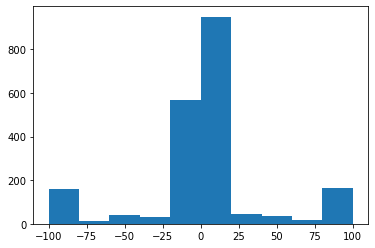

In [26]:
plt.hist(obp_atts_by_obp_2007_df.BUYSELLYIELD)

(array([2.021e+03, 9.200e+01, 3.100e+01, 1.000e+01, 7.000e+00, 3.000e+00,
        0.000e+00, 5.000e+00, 4.000e+00, 2.000e+00]),
 array([1.78410419e-06, 2.95985981e-02, 5.91954122e-02, 8.87922262e-02,
        1.18389040e-01, 1.47985854e-01, 1.77582668e-01, 2.07179482e-01,
        2.36776296e-01, 2.66373110e-01, 2.95969924e-01]),
 <BarContainer object of 10 artists>)

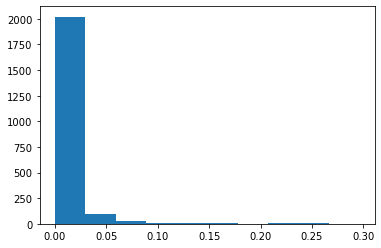

In [27]:
plt.hist(obp_atts_by_obp_2007_df.OBPTDVOLRATIO)

(array([ 80., 226., 244.,  61., 229., 325., 541., 226., 176.,  67.]),
 array([2145.05 , 2150.145, 2155.24 , 2160.335, 2165.43 , 2170.525,
        2175.62 , 2180.715, 2185.81 , 2190.905, 2196.   ]),
 <BarContainer object of 10 artists>)

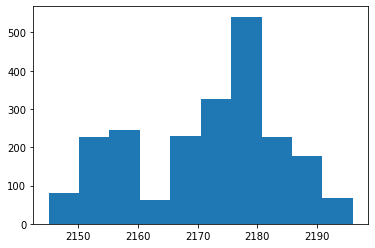

In [28]:
plt.hist(obp_atts_by_obp_2007_df.MINMAXRATIO)